Saving stock_data.csv to stock_data (1).csv
Prediction Accuracy: 0.00%


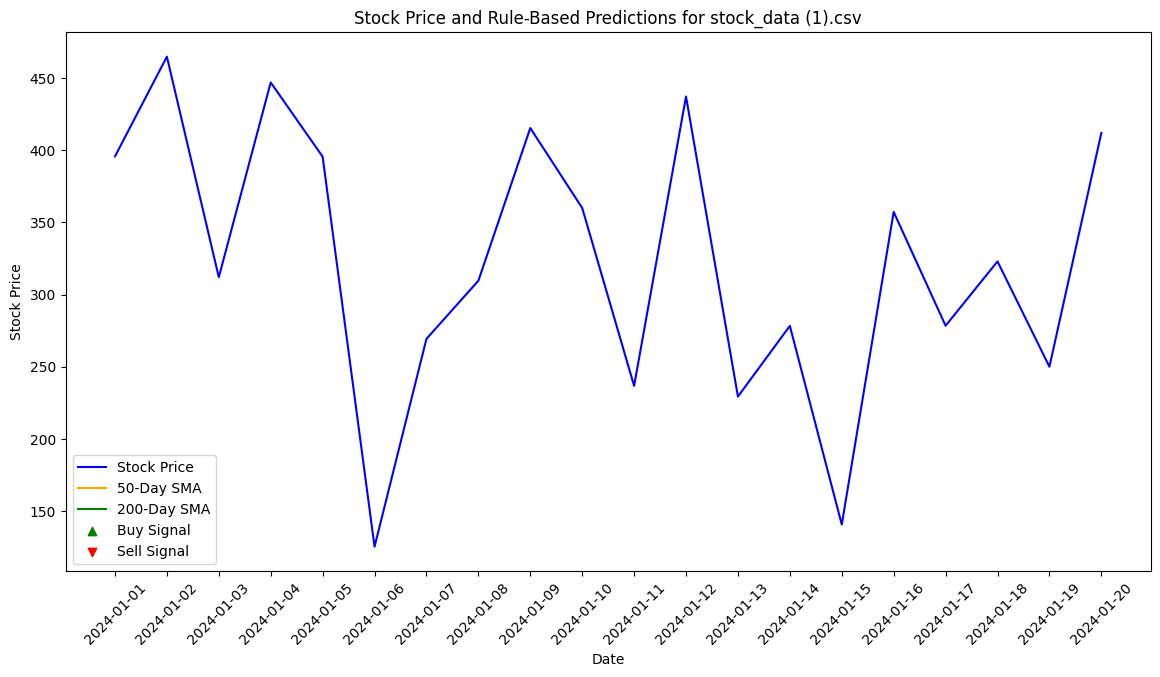

In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Upload file in Google Colab
from google.colab import files

# Upload a CSV file with stock price data
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
# Assuming the file has columns like 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv('/content/stock_data.csv')

# Check the first few rows to understand the structure of the dataset
df.head()

# Step 2: Feature Engineering (Calculating Technical Indicators)
df['SMA_50'] = df['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
df['Price_Change'] = df['Close'].pct_change()  # Percentage change in stock price

# Step 3: Define Rule-based Algorithm to Predict Price Movement
def predict_price_movement(row):
    if row['SMA_50'] > row['SMA_200'] and row['Price_Change'] > 0:
        return 1  # Predict price increase (Buy signal)
    elif row['SMA_50'] < row['SMA_200'] and row['Price_Change'] < 0:
        return -1  # Predict price decrease (Sell signal)
    else:
        return 0  # No movement or uncertain

# Apply the rule-based prediction
df['Prediction'] = df.apply(predict_price_movement, axis=1)

# Step 4: Evaluate the Predictions
# Shift the 'Prediction' column by 1 to compare the actual movement of the next day
df['Next_Day_Close'] = df['Close'].shift(-1)
df['Actual_Movement'] = np.where(df['Next_Day_Close'] > df['Close'], 1, -1)

# Calculate accuracy: Comparing prediction with actual movement
accuracy = (df['Prediction'] == df['Actual_Movement']).sum() / len(df) * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")

# Step 5: Visualize the Results
plt.figure(figsize=(14, 7))

# Plotting the stock price and moving averages
plt.plot(df['Date'], df['Close'], label='Stock Price', color='blue')
plt.plot(df['Date'], df['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(df['Date'], df['SMA_200'], label='200-Day SMA', color='green')

# Highlight Buy and Sell signals
buy_signals = df[df['Prediction'] == 1]
sell_signals = df[df['Prediction'] == -1]

plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f"Stock Price and Rule-Based Predictions for {file_name}")
plt.legend()
plt.xticks(rotation=45)
plt.show()